In [1]:
import json
import joblib
import numpy as np
import plotly
import pandas as pd
import re
import nltk

import plotly.express as px
# import plotly.graph_objects as go
from plotly.graph_objects import Bar

from flask import Flask
from flask import render_template, request, jsonify
from sqlalchemy import create_engine

from scipy import stats 
from sqlalchemy import create_engine

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [3]:
engine = create_engine('sqlite:///data/Project.db')
df = pd.read_sql_table('Project', engine)
engine.dispose()

In [22]:
genre_counts = df.groupby('genre').count()['message'].sort_values()
genre_names = list(genre_counts.index)

In [24]:
genre_names

['social', 'direct', 'news']

In [8]:
import matplotlib.pyplot as plt

<BarContainer object of 3 artists>

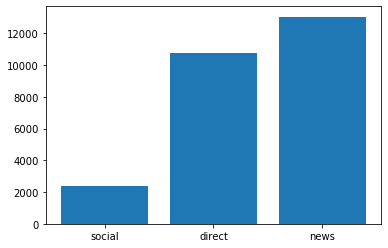

In [25]:
plt.bar(height=genre_counts,x=genre_names)

In [134]:
from googletrans import Translator
translator = Translator()

In [174]:
translator.translate('apa kabar').src

'id'

In [100]:
import progressbar

bar = progressbar.ProgressBar(max_value=len(df))
li = []

for i in range(len(df)):
    if df.iloc[i].original != None:
        li.append(translator.detect(df.iloc[i].original).lang)
    else:
        li.append('en')
    bar.update(i)
bar.finish    

100% (26215 of 26215) |##################| Elapsed Time: 0:00:00 ETA:  00:00:00
 98% (25884 of 26215) |################# | Elapsed Time: 0:40:13 ETA:   0:00:00

<bound method ProgressBar.finish of <progressbar.bar.ProgressBar object at 0x00000220AF8B9978>>

In [118]:
# np.unique(np.array(li))
lang = np.array(li)

In [120]:
lang

array(['fr', 'ht', 'ht', ..., 'en', 'en', 'en'], dtype='<U4')

In [121]:
unique, counts = np.unique(lang, return_counts=True)

In [127]:
lang_li = (np.asarray((unique, counts)).T)

In [135]:
pd.DataFrame(lang_li).head()

,0,1
0,affr,1
1,ar,1
2,aren,1
3,arhi,1
4,bn,1


In [141]:
df_lang = pd.DataFrame(lang_li, columns=['lang','counts'])

In [154]:
df_lang['counts'] = df_lang['counts'].astype(str).astype(int)

In [155]:
df_lang.dtypes

lang      object
counts     int32
dtype: object

In [159]:
df_lang = df_lang.sort_values(by='counts', ascending=False)
df_lang.to_csv('language.csv')

In [163]:
langs = pd.read_csv('./app/language.csv')

<BarContainer object of 10 artists>

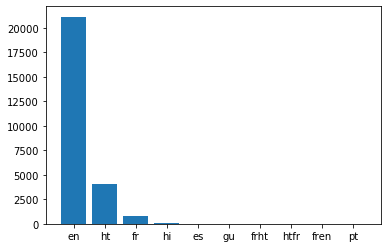

In [162]:
plt.bar(height=df_lang.counts[:10],x=df_lang.lang[:10])